In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Data

df = pd.read_csv(r'/kaggle/input/salary-data/Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [5]:
df.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1305,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
4442,45.0,Male,Master's Degree,Marketing Manager,20.0,204000.0
756,25.0,Female,Bachelor's,Data Analyst,2.0,110000.0
3602,39.0,Male,Master's Degree,Senior HR Generalist,10.0,105000.0
5716,37.0,Male,Master's Degree,Marketing Director,14.0,190000.0
5532,36.0,Female,PhD,Research Scientist,12.0,160000.0
473,34.0,Male,Bachelor's,Product Manager,9.0,185000.0
874,31.0,Male,Bachelor's,Data Analyst,9.0,195000.0
2372,48.0,Male,PhD,Director of Data Science,18.0,210000.0
3742,45.0,Male,PhD,Data Scientist,18.0,180000.0


In [6]:
df.shape

(6704, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


# Data Cleaning


In [8]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [9]:
df = df.dropna()

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [10]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [11]:
df = df.drop_duplicates()

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [12]:
df.shape

(1787, 6)

In [13]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     768
Master's       568
PhD            341
High School    110
Name: count, dtype: int64

# Data Stats

In [14]:
df.describe()

,Age,Years of Experience,Salary
count,1787.000000,1787.000000,1787.000000
mean,35.139899,9.156128,113184.659765
std,8.213045,6.844924,51596.536766
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


# Data Distribution

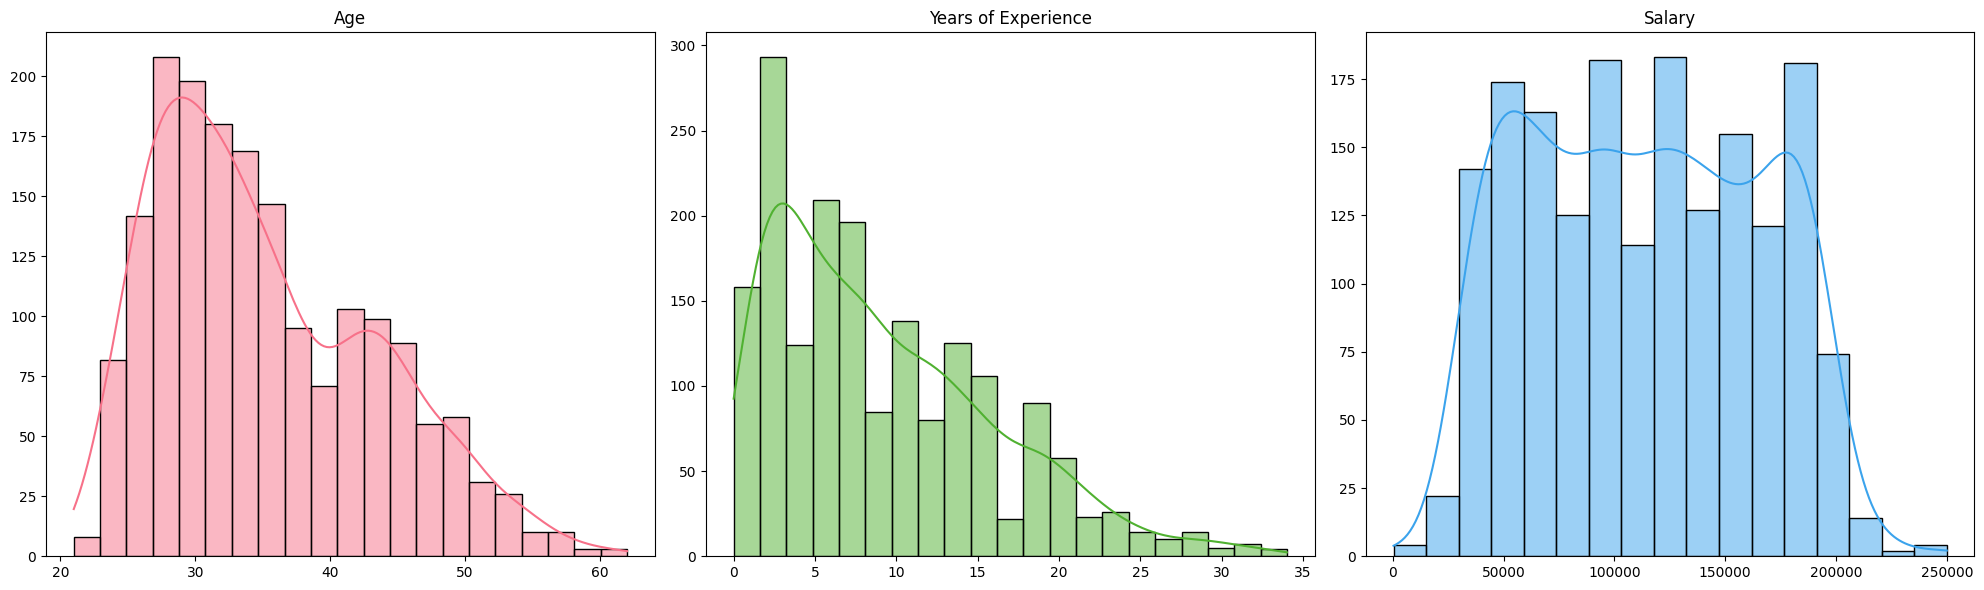

In [15]:
# Define the list of columns to plot
columns = [
    "Age", "Years of Experience", "Salary"
]

# Define a list of unique colors (length should match or exceed the number of columns)
colors = sns.color_palette("husl", len(columns))  # 'husl' generates visually distinct colors

# Create a 4x3 grid for histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


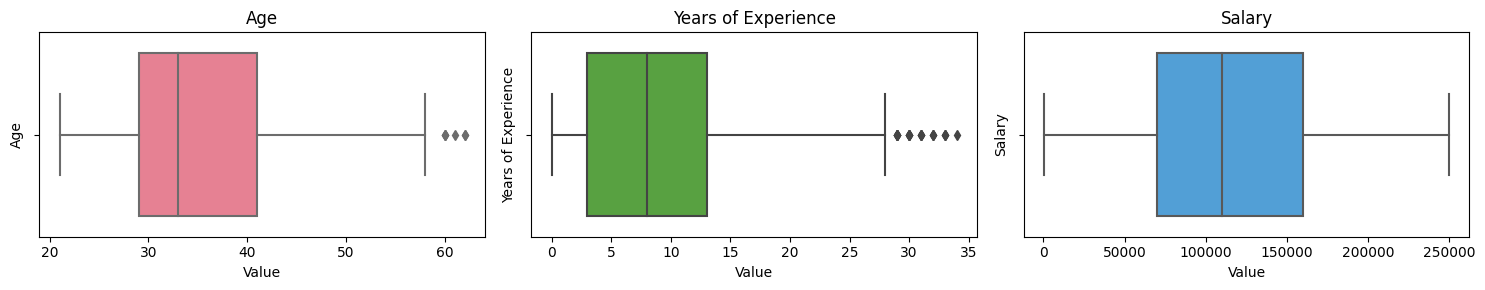

In [16]:
# Define a list of unique colors (length should match or exceed the number of columns)
colors = sns.color_palette("husl", len(columns))  # 'husl' generates visually distinct colors

# Create a 4x3 grid for box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axes[i], color=colors[i])  # Set `x=column` for horizontal box plots
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")  # Generic x-axis label for all plots
    axes[i].set_ylabel(column)  # Show the column name on the y-axis

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


# Data Correlations

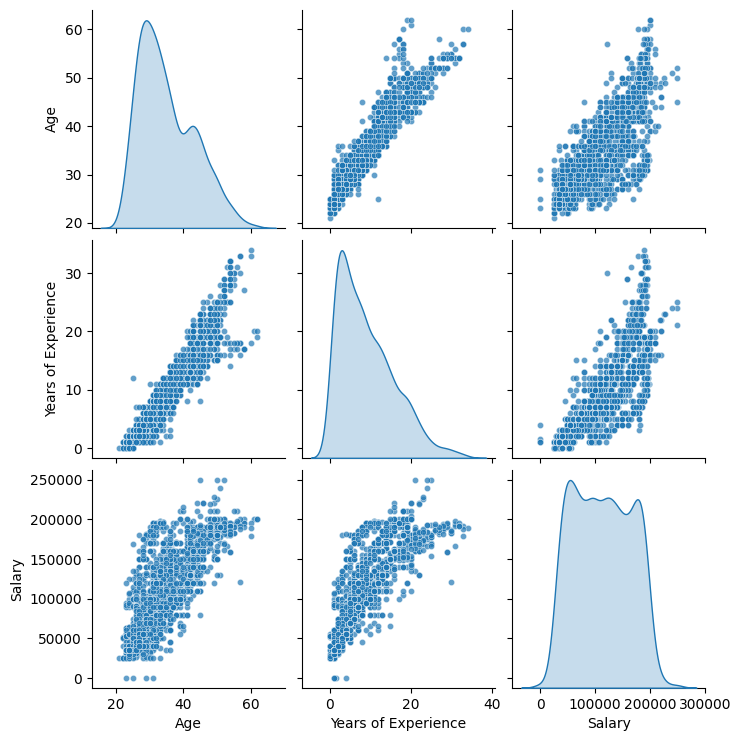

In [17]:
# Select only the relevant columns from the DataFrame
correlation_data = df[columns]

# Create a pairplot for the selected columns
sns.pairplot(correlation_data, diag_kind="kde", plot_kws={"alpha": 0.7, "s": 20})

# Show the plots
plt.show()

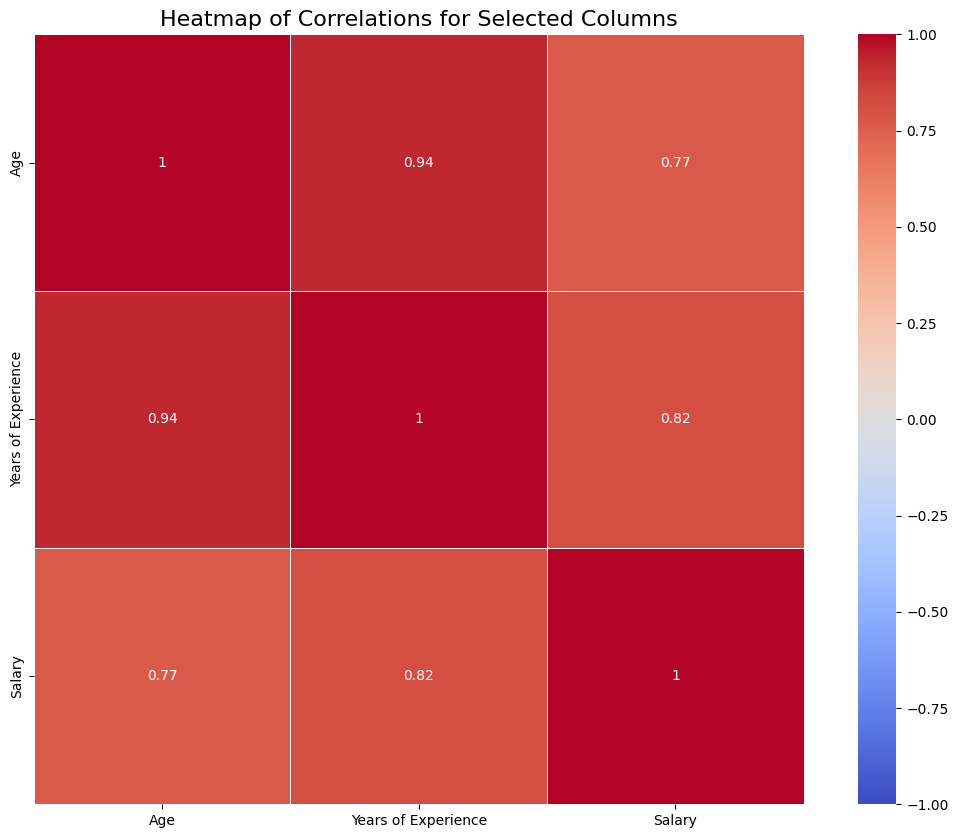

In [18]:
corr_data = df[columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Heatmap of Correlations for Selected Columns', fontsize=16)
plt.show()

# Data Visualization

In [ ]:
df

In [19]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'iframe'

fig = px.sunburst(df, path=['Gender', 'Education Level', 'Job Title', 'Years of Experience'], values='Salary')
fig.show()

In [ ]:
df

In [20]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

175

In [21]:
# Omitting titles with less than 25 counts

df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

17

In [22]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     768
Master's       568
PhD            341
High School    110
Name: count, dtype: int64

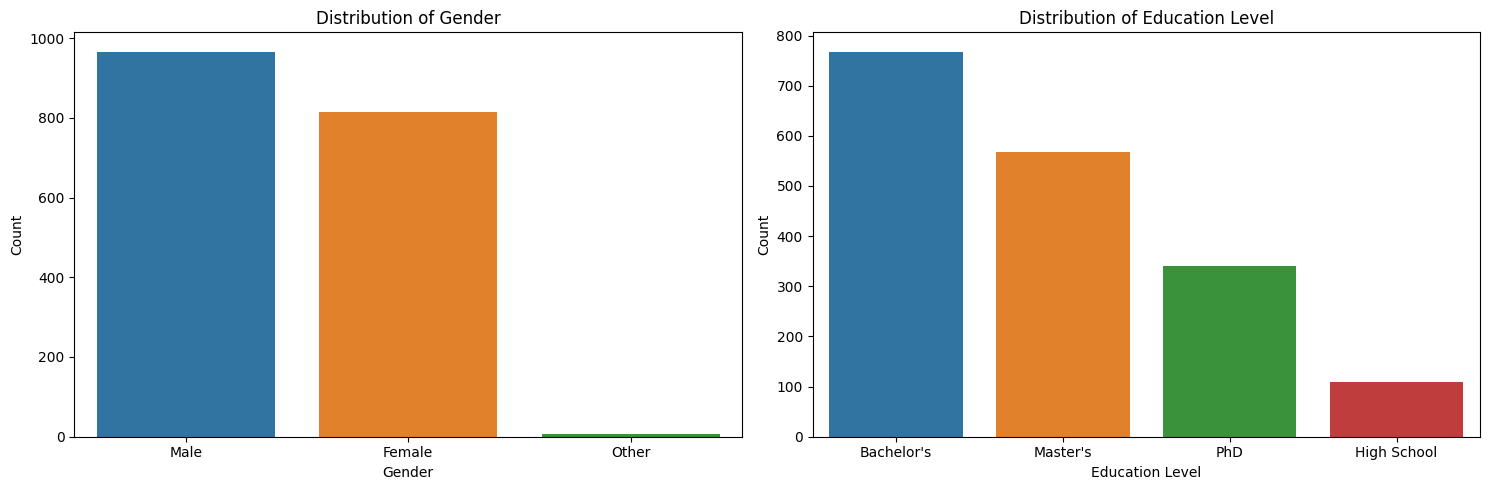

In [23]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=df, ax=ax[0])

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

# Feature Engineering

In [27]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Experience Level
0,-0.382413,Male,Bachelor's,Software Engineer,-0.607354,90000.0,NaN
1,-0.869580,Female,Master's,Data Analyst,-0.899623,65000.0,NaN
2,1.200878,Male,PhD,Others,0.853992,150000.0,Entry
3,0.104753,Female,Bachelor's,Others,-0.315085,60000.0,NaN
4,2.053419,Male,Master's,Others,1.584664,200000.0,Entry
...,...,...,...,...,...,...,...
6623,0.957294,Female,Master's,Others,0.853992,150000.0,Entry
6624,-0.991371,Male,High School,Others,-1.045757,40000.0,NaN
6625,-0.260622,Female,Bachelor's,Director of Marketing,-0.168950,80000.0,NaN
6628,0.226545,Male,Bachelor's,Others,-0.315085,90000.0,NaN


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience']] = scaler.fit_transform(df[['Age', 'Years of Experience']])

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.382413,Male,Bachelor's,Software Engineer,-0.607354,90000.0
1,-0.869580,Female,Master's,Data Analyst,-0.899623,65000.0
2,1.200878,Male,PhD,Others,0.853992,150000.0
3,0.104753,Female,Bachelor's,Others,-0.315085,60000.0
4,2.053419,Male,Master's,Others,1.584664,200000.0
...,...,...,...,...,...,...
6623,0.957294,Female,Master's,Others,0.853992,150000.0
6624,-0.991371,Male,High School,Others,-1.045757,40000.0
6625,-0.260622,Female,Bachelor's,Director of Marketing,-0.168950,80000.0
6628,0.226545,Male,Bachelor's,Others,-0.315085,90000.0


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_gender = LabelEncoder()
le_education = LabelEncoder()
le_job = LabelEncoder()

# Apply Label Encoding
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Education Level'] = le_education.fit_transform(df['Education Level'])
df['Job Title'] = le_job.fit_transform(df['Job Title'])

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.382413,1,0,14,-0.607354,90000.0
1,-0.869580,0,2,1,-0.899623,65000.0
2,1.200878,1,3,10,0.853992,150000.0
3,0.104753,0,0,10,-0.315085,60000.0
4,2.053419,1,2,10,1.584664,200000.0
...,...,...,...,...,...,...
6623,0.957294,0,2,10,0.853992,150000.0
6624,-0.991371,1,1,10,-1.045757,40000.0
6625,-0.260622,0,0,4,-0.168950,80000.0
6628,0.226545,1,0,10,-0.315085,90000.0


# ML Model Training

In [30]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Salary'])  # Drop non-relevant columns
y = df['Salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1429, 5) (358, 5) (1429,) (358,)


In [31]:
X_test.to_csv('test.csv',  index = None)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42),
}

In [33]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": model_name, "MSE": mse, "R2": r2})

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)

                    Model           MSE        R2
6                 XGBoost  3.038229e+08  0.889113
2           Random Forest  3.068149e+08  0.888021
3       Gradient Boosting  3.259425e+08  0.881040
5     K-Nearest Neighbors  4.092009e+08  0.850653
1           Decision Tree  5.265235e+08  0.807834
0       Linear Regression  8.806772e+08  0.678578
4  Support Vector Machine  2.735955e+09  0.001454


In [34]:
# Step 6: Select the best model
best_model_name = results_df.iloc[0]["Model"]
print(f"Best model: {best_model_name}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)

Best model: XGBoost


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Metrics

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the models (example for one model)
y_pred = best_model.predict(X_test)  # Replace `best_model` with your model variable
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 303822869.1832
Root Mean Squared Error: 17430.5155
Mean Absolute Error: 11157.4107
R² Score: 0.8891


In [36]:
import joblib

model_filename = f"{best_model_name}_salary_model.pkl"
joblib.dump(best_model, model_filename)

print(f"Model saved successfully as {model_filename}")

Model saved successfully as XGBoost_salary_model.pkl
